In [45]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Load the dataset
df = pd.read_csv('sales1.csv')

### Explanation:
####  We start by importing necessary libraries and loading the dataset.
#### We display the first few rows of the dataset, check its information, shape, and identify missing values.
####  Columns are renamed for consistency and ease of use in subsequent analysis.

In [2]:
# Display the first few rows of the dataset
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
                           Name      From          To Departure Status  \
0             MR MICHAEL PRAJOM    Nairobi  Mogadishu               NO   
1  MRS ANDREA ALEXANDRA JANSSEN    Nairobi   Hargeysa              YES   
2    MR ABDINASIR MOHAMOUD ADAM   Hargeysa  Mogadishu              YES   
3    MR ABDINASIR MOHAMOUD ADAM  Mogadishu   Kismaayo              YES   
4      MR ABDULLAHI OMAR KEINAN     Garowe    Nairobi              YES   
5               MR FAISAL FARAH  Mogadishu  Bardheere               NO   
6           MR ABDIRAHMAN HIRAD  Mogadishu   Kismaayo              YES   
7          MR MOHAMED SAID ADEN  Mogadishu   Kismaayo              YES   
8         MR OMAR AHMED MOHAMED     Garowe  Mogadishu              YES   
9                MR EVANS OWINO   Kismaayo  Mogadishu              YES   

  Departure Date               Remarks    Office   Client's phone number   \
0       8/7/2023  cancelled by mohamed  MOGADISHU                     NaN   
1

In [3]:
# Get information about the dataset
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    493 non-null    object 
 1   From                    492 non-null    object 
 2   To                      492 non-null    object 
 3   Departure Status        471 non-null    object 
 4   Departure Date          492 non-null    object 
 5   Remarks                 47 non-null     object 
 6   Office                  493 non-null    object 
 7   Client's phone number   82 non-null     float64
 8   Airline                 491 non-null    object 
 9   Customer Type           486 non-null    object 
 10  Sales Person            0 non-null      float64
 11  INVOICE NUMBER          430 non-null    object 
 12   INVOICE AMOUNT         436 non-null    object 
 13  PAYMENT VOUCHER         336 non-null    object 
 14   PAID AMOU

In [4]:
# Check the shape of the dataset
print("\nShape of the dataset:")
print(df.shape)


Shape of the dataset:
(513, 16)


In [5]:
# Check for any missing values in the dataset
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Name                       20
From                       21
To                         21
Departure Status           42
Departure Date             21
Remarks                   466
Office                     20
Client's phone number     431
Airline                    22
Customer Type              27
Sales Person              513
INVOICE NUMBER             83
 INVOICE AMOUNT            77
PAYMENT VOUCHER           177
 PAID AMOUNT               79
 MARING                    38
dtype: int64


In [6]:
df.duplicated().sum()

17

In [7]:
df.columns

Index(['Name', 'From ', 'To', 'Departure Status', 'Departure Date', 'Remarks',
       'Office ', 'Client's phone number ', 'Airline', 'Customer Type',
       'Sales Person', 'INVOICE NUMBER', ' INVOICE AMOUNT ', 'PAYMENT VOUCHER',
       ' PAID AMOUNT ', ' MARING '],
      dtype='object')

In [8]:
# Remove spaces from column names
df.columns = df.columns.str.replace(' ', '')

# Rename columns (if necessary)
df = df.rename(columns={
    'DepartureDate': 'Departure_Date',  # Optional renaming (already done in previous step)
    'DepartureStatus': 'Departure_Status',  # Optional renaming
    'CustomerType': 'Customer_Type',  # Optional renaming
    'INVOICEAMOUNT': 'Sales_Price',  # Optional renaming (fixing extra space)
    'PAIDAMOUNT': 'Purchase_Amount',  # Optional renaming (fixing extra space)
    'MARING': 'Gross_Profit'  # Optional renaming (fixing extra space)
})

print(df.columns)


Index(['Name', 'From', 'To', 'Departure_Status', 'Departure_Date', 'Remarks',
       'Office', 'Client'sphonenumber', 'Airline', 'Customer_Type',
       'SalesPerson', 'INVOICENUMBER', 'Sales_Price', 'PAYMENTVOUCHER',
       'Purchase_Amount', 'Gross_Profit'],
      dtype='object')


## DATA PROPRECESSHING AND CLEANING

### Explanation:
#### We preprocess the 'Departure_Date' column to ensure it's in datetime format.
#### Currency columns are cleaned by removing unnecessary characters like
####  '$'  and leading/trailing spaces.
#### Currency columns are converted to numeric format for analysis.
#### Missing values in 'Departure_Status' column are filled with 'NO'.
#### NaN values in selected columns are replaced with 0 to ensure numerical consistency.

In [9]:
# Function to preprocess date strings
def preprocess_date(date_str):
    try:
        # Try parsing with multiple formats
        return dt.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
    except ValueError:
        return np.nan

In [10]:
# Preprocess 'Departure_Date' column
def preprocess_date(date_str):
    try:
        return pd.to_datetime(date_str, errors='coerce')
    except:
        return None

# Assuming 'Departure_Date' is the correct column name (without space)
df['Departure_Date'] = df['Departure_Date'].apply(preprocess_date)


C:\Users\surface\AppData\Local\Temp\ipykernel_6232\3652123622.py:4: UserWarning: Parsing dates in SUNDAY/%d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(date_str, errors='coerce')


In [11]:
df.columns

Index(['Name', 'From', 'To', 'Departure_Status', 'Departure_Date', 'Remarks',
       'Office', 'Client'sphonenumber', 'Airline', 'Customer_Type',
       'SalesPerson', 'INVOICENUMBER', 'Sales_Price', 'PAYMENTVOUCHER',
       'Purchase_Amount', 'Gross_Profit'],
      dtype='object')

In [12]:
# Drop unnecessary columns
columns_to_drop = ["Office", "Client'sphonenumber", "SalesPerson", "INVOICENUMBER", "Remarks", "PAYMENTVOUCHER"]
df_cleaned = df.drop(columns=columns_to_drop)
df = df_cleaned

In [13]:
df.head()

,Name,From,To,Departure_Status,Departure_Date,Airline,Customer_Type,Sales_Price,Purchase_Amount,Gross_Profit
0,MR MICHAEL PRAJOM,Nairobi,Mogadishu,NO,2023-08-07,FREEDOM,SCI MGQ,NaN,NaN,$ -
1,MRS ANDREA ALEXANDRA JANSSEN,Nairobi,Hargeysa,YES,2023-08-08,FREEDOM,SCI MGQ,$350.00,$330.00,$20.00
2,MR ABDINASIR MOHAMOUD ADAM,Hargeysa,Mogadishu,YES,2023-08-07,AFRICA EXPRESS,NRC-JL,$190.00,$150.00,$40.00
3,MR ABDINASIR MOHAMOUD ADAM,Mogadishu,Kismaayo,YES,2023-08-08,SOMEXPRESS,NRC-JL,$140.00,$120.00,$20.00
4,MR ABDULLAHI OMAR KEINAN,Garowe,Nairobi,YES,2023-08-10,FREEDOM,NRC PUNTLAND,$370.00,$320.00,$50.00


In [14]:
# Check for any missing values in the dataset
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Name                20
From                21
To                  21
Departure_Status    42
Departure_Date      29
Airline             22
Customer_Type       27
Sales_Price         77
Purchase_Amount     79
Gross_Profit        38
dtype: int64


In [15]:
# Check for duplicated rows
print("Duplicated rows:", df_cleaned.duplicated().sum())

# Check for missing values in each column
print("Missing values in each column:\n", df_cleaned.isnull().sum())



Duplicated rows: 18
Missing values in each column:
 Name                20
From                21
To                  21
Departure_Status    42
Departure_Date      29
Airline             22
Customer_Type       27
Sales_Price         77
Purchase_Amount     79
Gross_Profit        38
dtype: int64


In [16]:
df.loc[df.duplicated()]

,Name,From,To,Departure_Status,Departure_Date,Airline,Customer_Type,Sales_Price,Purchase_Amount,Gross_Profit
134,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
135,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
152,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
173,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
174,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
179,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [17]:
df = df.drop_duplicates()


In [18]:
# Check for duplicated rows
print("Duplicated rows:", df.duplicated().sum())

# Check for missing values in each column
print("Missing values in each column:\n", df.isnull().sum())

Duplicated rows: 0
Missing values in each column:
 Name                 2
From                 3
To                   3
Departure_Status    24
Departure_Date      11
Airline              4
Customer_Type        9
Sales_Price         59
Purchase_Amount     61
Gross_Profit        20
dtype: int64


In [19]:
# Summary statistics of categorical columns
print("Summary statistics of categorical columns:\n", df_cleaned.describe(include='object'))


Summary statistics of categorical columns:
                     Name       From         To Departure_Status  Airline  \
count                493        492        492              471      491   
unique               266         46         60                2       22   
top     MR NHAMO NDEBELE  Mogadishu  Mogadishu              YES  FREEDOM   
freq                  18        168        154              435       91   

       Customer_Type Sales_Price Purchase_Amount Gross_Profit  
count            486         436             434          475  
unique             5          28              37           26  
top           NRC-JL    $150.00         $130.00       $20.00   
freq             265         118             104          163  


In [20]:
# Summary statistics of numerical columns
print("Summary statistics of numerical columns:\n", df_cleaned.describe())

Summary statistics of numerical columns:
                       Departure_Date
count                            484
mean   2023-11-08 17:24:17.851239424
min              2023-08-06 00:00:00
25%              2023-09-13 18:00:00
50%              2023-10-27 12:00:00
75%              2024-01-04 12:00:00
max              2024-02-29 00:00:00


In [21]:
# Fill missing values with appropriate method
df['Departure_Status'] = df['Departure_Status'].fillna('NO')
df['Purchase_Amount'].fillna(0, inplace=True)
df['Sales_Price'].fillna(0, inplace=True)
df['Gross_Profit'].fillna(0, inplace=True)

C:\Users\surface\AppData\Local\Temp\ipykernel_6232\1281189392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Departure_Status'] = df['Departure_Status'].fillna('NO')
C:\Users\surface\AppData\Local\Temp\ipykernel_6232\1281189392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Purchase_Amount'].fillna(0, inplace=True)
C:\Users\surface\AppData\Local\Temp\ipykernel_6232\1281189392.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [22]:
df['Purchase_Amount'] = df['Purchase_Amount'].str.strip().str.replace('$', '')  # Remove spaces and dollar signs
df['Sales_Price'] = df['Sales_Price'].str.strip().str.replace('$', '')  # Remove spaces and dollar signs
df['Gross_Profit'] = df['Gross_Profit'].str.strip().str.replace('$', '')  # Remove spaces and dollar signs
# Convert currency columns to numeric
df['Purchase_Amount'] = pd.to_numeric(df['Purchase_Amount'])
df['Sales_Price'] = pd.to_numeric(df['Sales_Price'])
df['Gross_Profit'] = pd.to_numeric(df['Gross_Profit'], errors='coerce')

# Fill missing values in 'Departure_Status' column
df['Departure_Status'] = df['Departure_Status'].fillna('NO')

# Replace NaN values in selected columns with 0
df['Purchase_Amount'] = df['Purchase_Amount'].fillna(0)
df['Gross_Profit'] = df['Gross_Profit'].fillna(0)
df['Sales_Price'] = df['Sales_Price'].fillna(0)

C:\Users\surface\AppData\Local\Temp\ipykernel_6232\3741186310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Purchase_Amount'] = df['Purchase_Amount'].str.strip().str.replace('$', '')  # Remove spaces and dollar signs
C:\Users\surface\AppData\Local\Temp\ipykernel_6232\3741186310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_Price'] = df['Sales_Price'].str.strip().str.replace('$', '')  # Remove spaces and dollar signs
C:\Users\surface\AppData\Local\Temp\ipykernel_6232\3741186310.py:3

In [23]:
# Check for missing values in each column
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 Name                 2
From                 3
To                   3
Departure_Status     0
Departure_Date      11
Airline              4
Customer_Type        9
Sales_Price          0
Purchase_Amount      0
Gross_Profit         0
dtype: int64


In [24]:
# Locate missing values in DataFrame
missing_values = df[df.isna().any(axis=1)]

# Display rows with missing values
print(missing_values)

                           Name       From         To Departure_Status  \
111                         NaN        NaN        NaN               NO   
168                         NaN        NaN        NaN               NO   
251            MR MOHAMOUD GEDI  Mogadishu    Kismayo               NO   
258              MR HASSAN ELMI     DOLLOW  Mogadishu               NO   
259              MR HASSAN ELMI  Mogadishu    Kismayo               NO   
271         MR ABDULLAHI KHALIF  Mogadishu     Dollow               NO   
284        MR ALI ABDI MOHAMOUD  Mogadishu    kismayo               NO   
285               MR ABDI AREYS    DHOBLEY  Mogadishu               NO   
332    MR ABUKAR HASSAN MOHAMUD     Jowhar  mogadishu               NO   
385                  ABDI ARESS   KISMANYO  MOGADISHO              YES   
388          ABDIRAHMAN GARANE    KISMANYO  MOGADISHO              YES   
391       KOWSAR ABDULAHI YASIN  mogadishu    GAROWE               YES   
392               HARON EMUKULE  mogad

In [25]:
# Specify subset of columns to check for missing values
subset_cols = ['Name', 'Departure_Status', 'Customer_Type']

# Locate missing values in the specified subset of columns
missing_values_subset = df[df[subset_cols].isna().any(axis=1)]

# Display rows with missing values in the specified subset of columns
print(missing_values_subset)

                     Name       From         To Departure_Status  \
111                   NaN        NaN        NaN               NO   
168                   NaN        NaN        NaN               NO   
251      MR MOHAMOUD GEDI  Mogadishu    Kismayo               NO   
258        MR HASSAN ELMI     DOLLOW  Mogadishu               NO   
259        MR HASSAN ELMI  Mogadishu    Kismayo               NO   
271   MR ABDULLAHI KHALIF  Mogadishu     Dollow               NO   
284  MR ALI ABDI MOHAMOUD  Mogadishu    kismayo               NO   
285         MR ABDI AREYS    DHOBLEY  Mogadishu               NO   
393     SHIRWAC ABDUKADIR        NaN        NaN               NO   

    Departure_Date          Airline Customer_Type  Sales_Price  \
111            NaT              NaN           NaN          0.0   
168            NaT              NaN           NaN          0.0   
251     2023-10-25         MAANDEEQ           NaN          0.0   
258     2023-10-29         MAANDEEQ           NaN      

In [26]:
# Remove rows with missing values in specific columns
subset_cols = ['Name']
df_cleaned = df.dropna(subset=subset_cols)

# Display the cleaned DataFrame
print(df_cleaned)


                             Name       From         To Departure_Status  \
0               MR MICHAEL PRAJOM    Nairobi  Mogadishu               NO   
1    MRS ANDREA ALEXANDRA JANSSEN    Nairobi   Hargeysa              YES   
2      MR ABDINASIR MOHAMOUD ADAM   Hargeysa  Mogadishu              YES   
3      MR ABDINASIR MOHAMOUD ADAM  Mogadishu   Kismaayo              YES   
4        MR ABDULLAHI OMAR KEINAN     Garowe    Nairobi              YES   
..                            ...        ...        ...              ...   
508            MOHAMED SAID OMAR    KISMANYO  MOGADISHU              YES   
509            MOHAMED SAID OMAR   MOGADISHU    GURICEL              YES   
510             ABDULLAHI KHALIF   MOGADISHU    DOOLOW               YES   
511         MOHAMED ABDI HUSEIN       ADADO   MOGADISHU               NO   
512       MOHAMED SULEIMAN TARABI     GAROWE  MOGADISHU               NO   

    Departure_Date         Airline Customer_Type  Sales_Price  \
0       2023-08-07    

In [27]:
df = df_cleaned

In [28]:
df.shape

(493, 10)

In [29]:
# Check for missing values in each column
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 Name                0
From                1
To                  1
Departure_Status    0
Departure_Date      9
Airline             2
Customer_Type       7
Sales_Price         0
Purchase_Amount     0
Gross_Profit        0
dtype: int64


In [30]:
# Specify subset of columns to check for missing values
subset_cols = ['From', 'To', 'Departure_Status', 'Departure_Date']

# Locate missing values in the specified subset of columns
missing_values_subset = df[df[subset_cols].isna().any(axis=1)]

# Display rows with missing values in the specified subset of columns
print(missing_values_subset)

                           Name       From         To Departure_Status  \
385                  ABDI ARESS   KISMANYO  MOGADISHO              YES   
388          ABDIRAHMAN GARANE    KISMANYO  MOGADISHO              YES   
391       KOWSAR ABDULAHI YASIN  mogadishu    GAROWE               YES   
392               HARON EMUKULE  mogadishu    GAROWE               YES   
393           SHIRWAC ABDUKADIR        NaN        NaN               NO   
395        ZAMZAM IBRAHIM BILE    KISMANYO   MOGDISHO              YES   
396        ZAMZAM IBRAHIM BILE   mogadishu    NAIROBI              YES   
397          ABDULLAHI KHALIFA    KISMANYO  MOGADISHO              YES   
404  ABDISHAKUR ABDIRAHMAN ALI   mogadishu    GAROWE               YES   

    Departure_Date        Airline Customer_Type  Sales_Price  Purchase_Amount  \
385            NaT        FREEDOM        NRC-JL        150.0           130.00   
388            NaT          FLY24        NRC-JL        150.0           130.00   
391            N

In [31]:
# Specify the row indices and replacement date values
row_indices = [385]  # Indices of the rows where you want to replace NaT
replacement_date = pd.Timestamp('2024-01-12')  # Specific date value to replace NaT

# Loop through each row index and replace NaT with the specified date value
for row_index in row_indices:
    df.loc[row_index, 'Departure_Date'] = replacement_date

# Display the DataFrame after replacement
print(missing_values_subset)


                           Name       From         To Departure_Status  \
385                  ABDI ARESS   KISMANYO  MOGADISHO              YES   
388          ABDIRAHMAN GARANE    KISMANYO  MOGADISHO              YES   
391       KOWSAR ABDULAHI YASIN  mogadishu    GAROWE               YES   
392               HARON EMUKULE  mogadishu    GAROWE               YES   
393           SHIRWAC ABDUKADIR        NaN        NaN               NO   
395        ZAMZAM IBRAHIM BILE    KISMANYO   MOGDISHO              YES   
396        ZAMZAM IBRAHIM BILE   mogadishu    NAIROBI              YES   
397          ABDULLAHI KHALIFA    KISMANYO  MOGADISHO              YES   
404  ABDISHAKUR ABDIRAHMAN ALI   mogadishu    GAROWE               YES   

    Departure_Date        Airline Customer_Type  Sales_Price  Purchase_Amount  \
385            NaT        FREEDOM        NRC-JL        150.0           130.00   
388            NaT          FLY24        NRC-JL        150.0           130.00   
391            N

# Data Visualization:

### Explanation:
##### We visualize total sales per month in 2023 and sales by customer type using bar charts to understand sales trends and customer preferences.
#### Another bar chart is plotted to visualize profit by customer type, providing insights into the profitability of different customer segments.




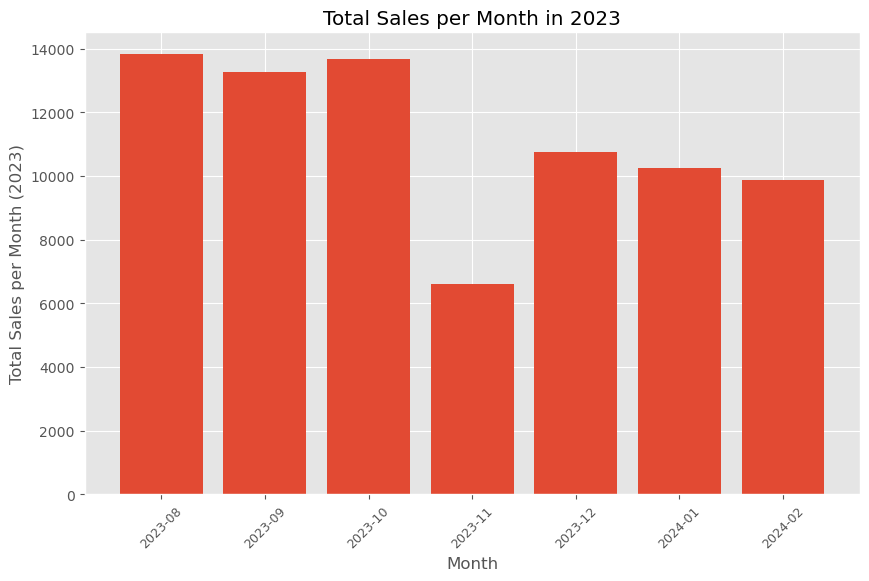

In [32]:
# Plot a bar chart of total sales per month in 2023
df['month'] = df['Departure_Date'].dt.strftime('%Y-%m')
df_by_month = df.groupby('month').sum(numeric_only=True).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(x=df_by_month['month'], height=df_by_month['Sales_Price'])
plt.xlabel("Month")
plt.ylabel("Total Sales per Month (2023)")
plt.title("Total Sales per Month in 2023")
plt.xticks(rotation=45, fontsize=9)
plt.show()

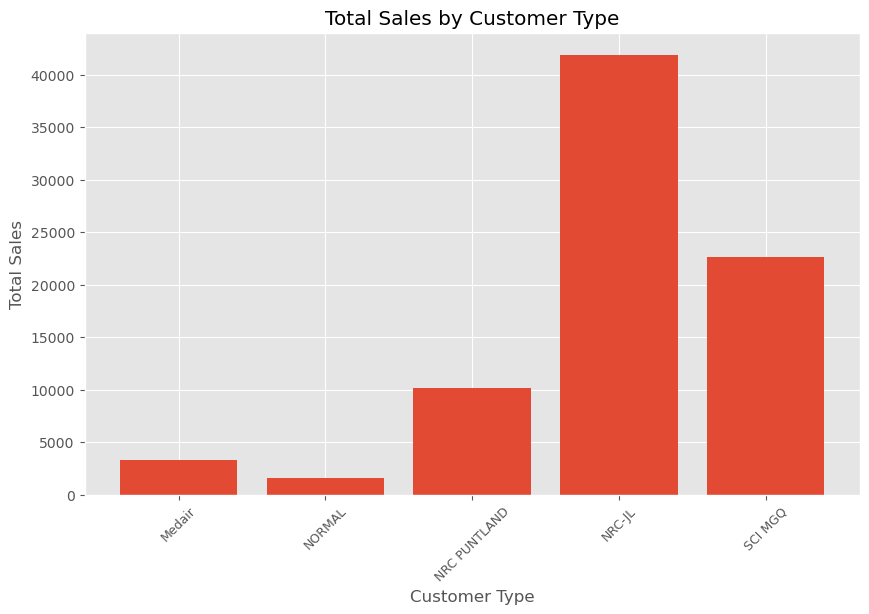

In [33]:

# Plot a bar chart of sales by customer type
df_by_customer = df.groupby('Customer_Type').sum(numeric_only=True).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(x=df_by_customer['Customer_Type'], height=df_by_customer['Sales_Price'])
plt.xlabel("Customer Type")
plt.ylabel("Total Sales")
plt.title("Total Sales by Customer Type")
plt.xticks(rotation=45, fontsize=9)
plt.show()

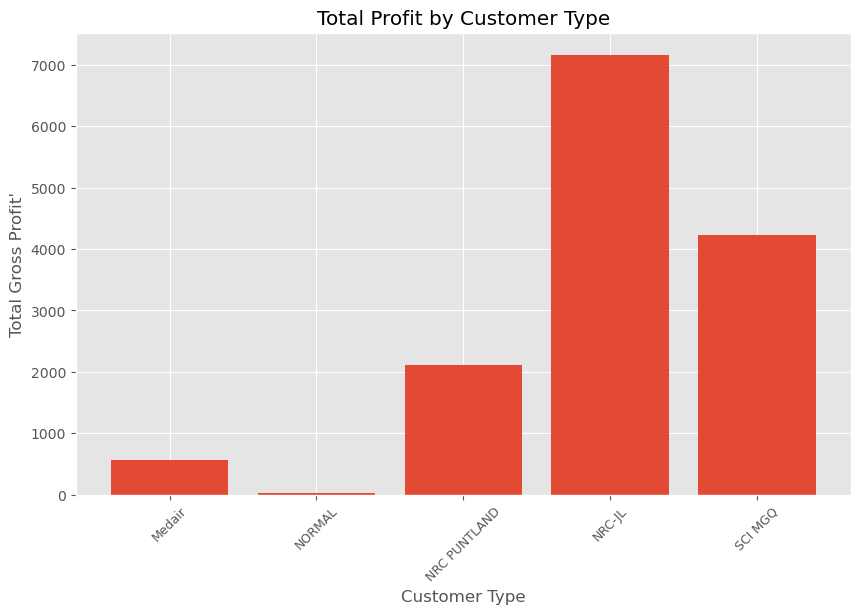

In [34]:
# Plot a bar chart of profit by customer type
plt.figure(figsize=(10, 6))
plt.bar(x=df_by_customer['Customer_Type'], height=df_by_customer['Gross_Profit'])
plt.xlabel("Customer Type")
plt.ylabel("Total Gross Profit'")
plt.title("Total Profit by Customer Type")
plt.xticks(rotation=45, fontsize=9)
plt.show()


# Exploratory Data Analysis (EDA):

### Explanation:
#### We visualize total sales per month in 2023 and sales by customer type using bar charts to understand sales trends and customer preferences.
#### Another bar chart is plotted to visualize profit by customer type, providing insights into the profitability of different customer segments

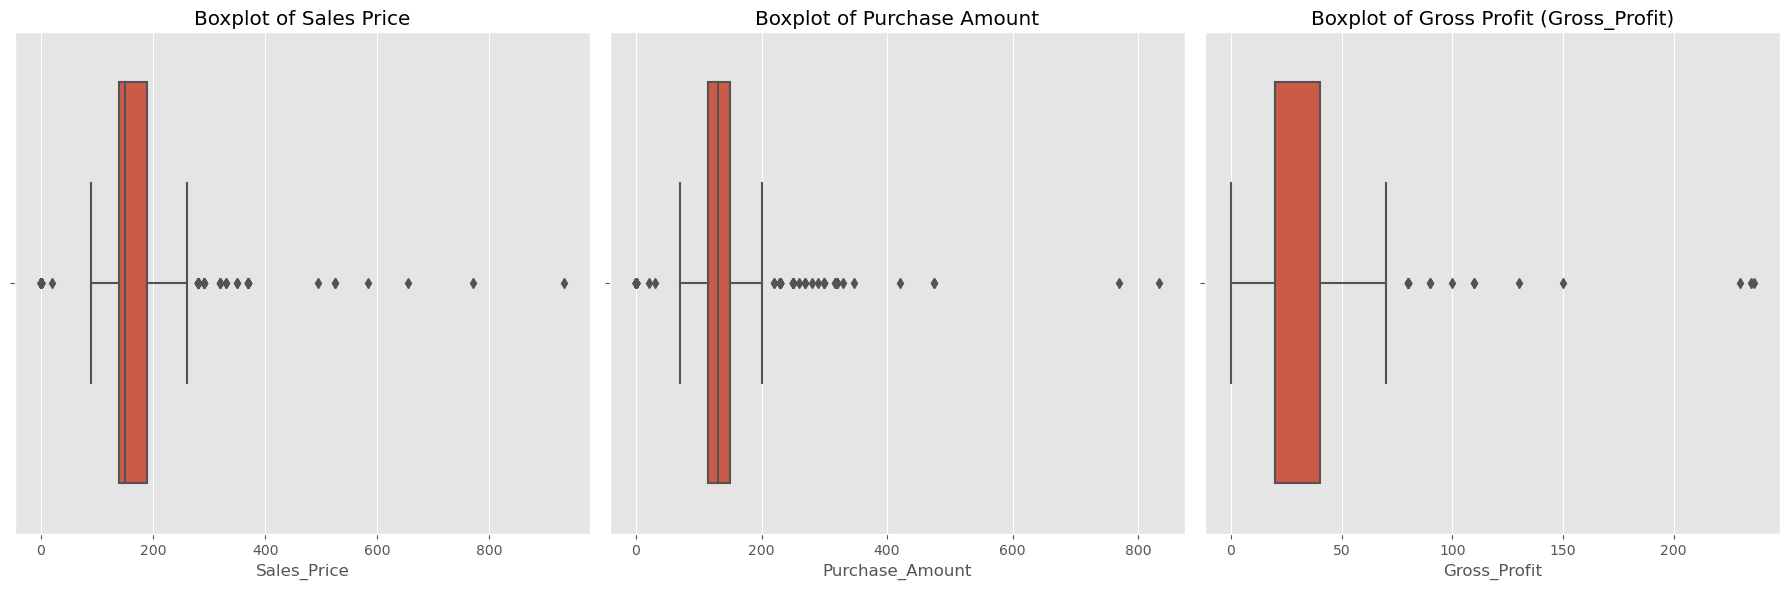

In [35]:
plt.figure(figsize=(18, 6))

# Subplot 1: Invoice Amount
plt.subplot(1, 3, 1)  # Defines a subplot occupying 1 row, 3 columns, position 1
sns.boxplot(x=df['Sales_Price'])
plt.title('Boxplot of Sales Price')

# Subplot 2: Paid Amount
plt.subplot(1, 3, 2)  # Defines a subplot occupying 1 row, 3 columns, position 2
sns.boxplot(x=df['Purchase_Amount'])
plt.title('Boxplot of Purchase Amount')

# Subplot 3: MARING (Gross Profit)
plt.subplot(1, 3, 3)  # Defines a subplot occupying 1 row, 3 columns, position 3
sns.boxplot(x=df['Gross_Profit'])
plt.title('Boxplot of Gross Profit (Gross_Profit)')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()


# Data Transformation and Heatmap Creation:

### Explanation:
#### Categorical data is converted into numerical form to compute the correlation matrix.
#### The correlation matrix is then visualized as a heatmap to identify relationships between different features.

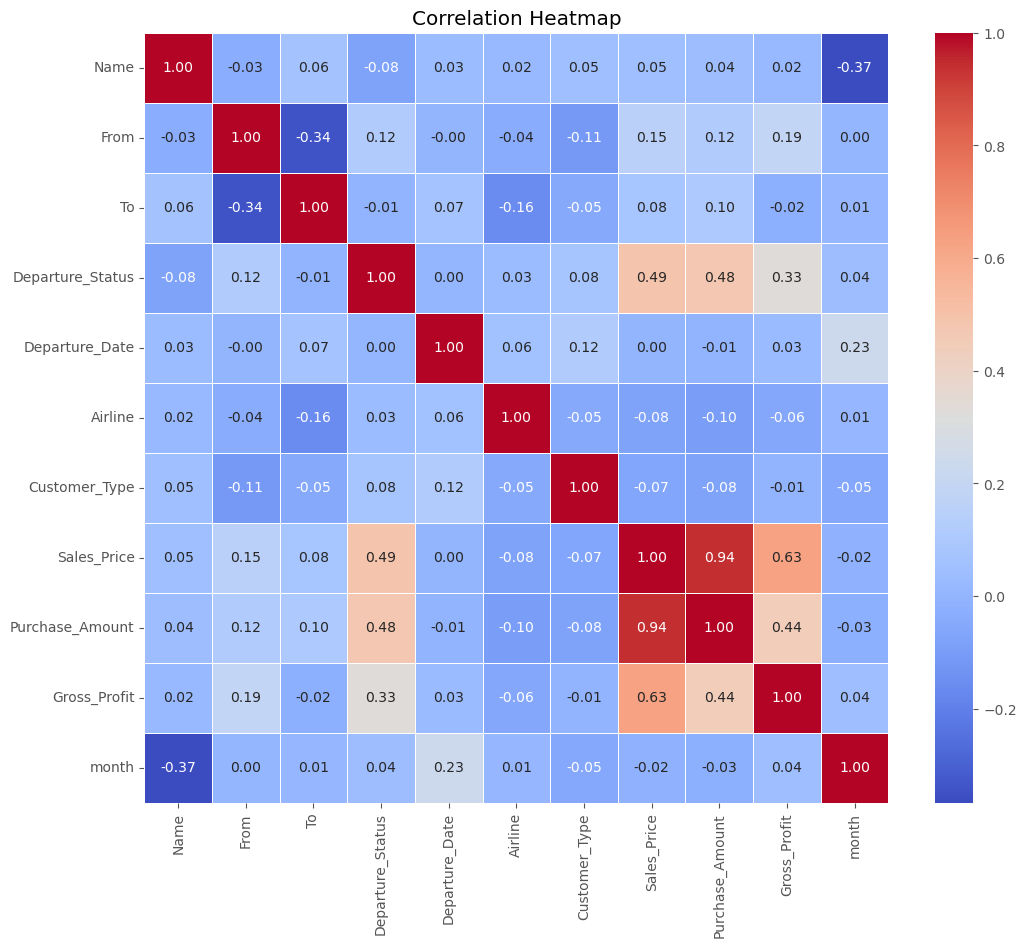

In [36]:
# Convert categorical columns to numerical for correlation analysis
df_numerized = df.copy()
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category').cat.codes

# Compute correlation matrix
correlation_matrix = df_numerized.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Further Analysis:

### Explanation:
#### We further analyze correlations among numeric features by dropping non-numeric columns.
#### A heatmap is generated specifically for numeric features to focus on their correlations.

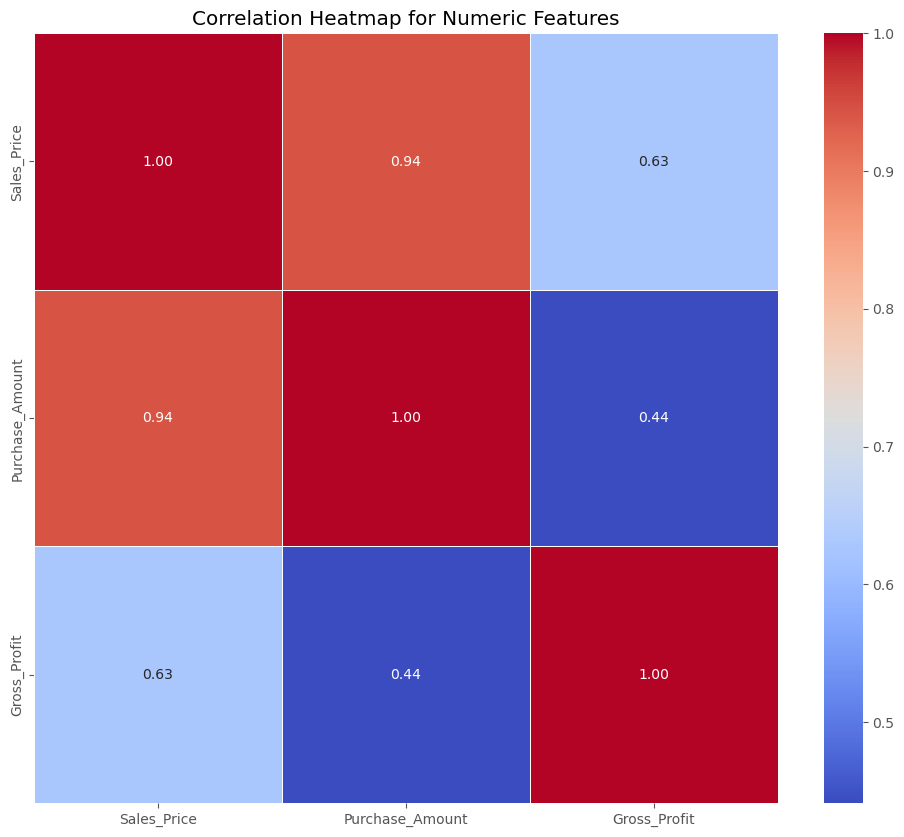

In [37]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Drop non-numeric columns to create a numeric-only DataFrame
df_numeric = df.drop(columns=non_numeric_columns)

# Compute correlation matrix for numeric features
correlation_matrix = df_numeric.corr()

# Plot heatmap for correlation among numeric features
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Features')
plt.show()


### Questions and Answers:
#### Q1: What is the distribution of profit per month?

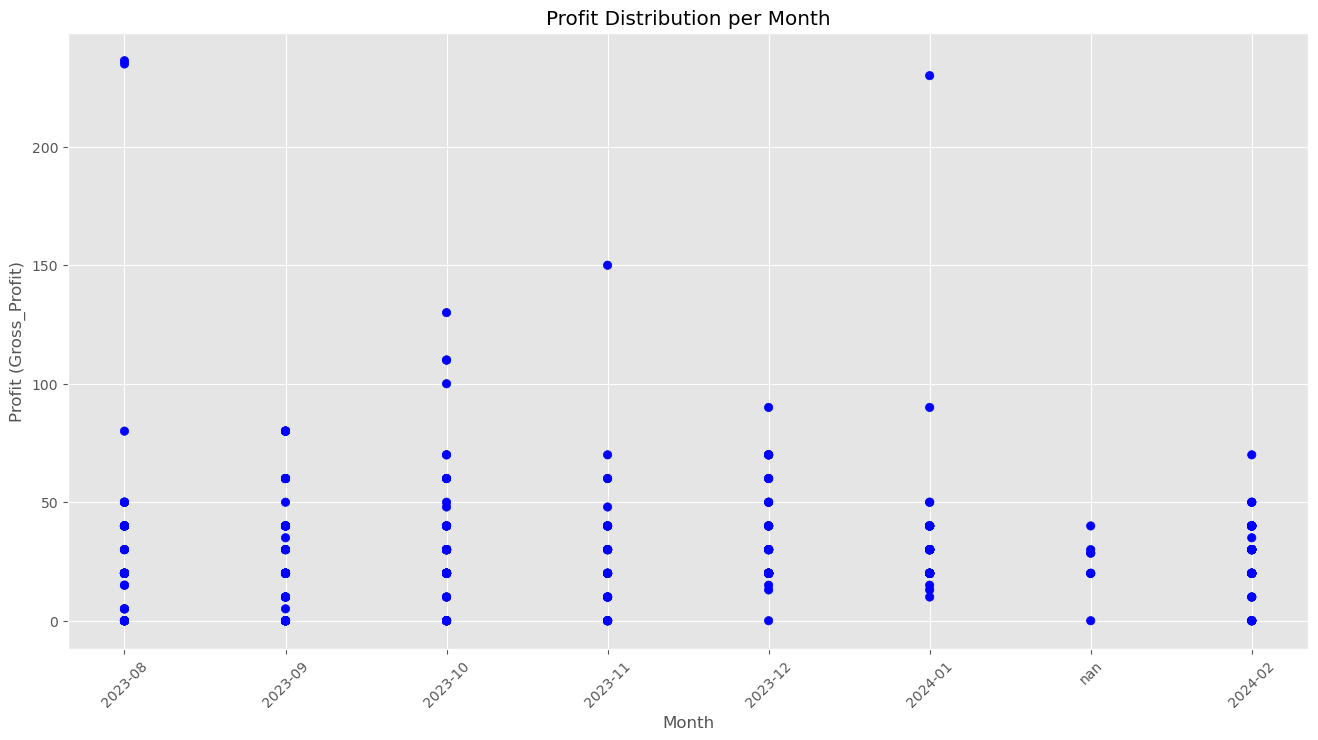

In [38]:
# Calculate outliers based on MARING
percentile25 = df['Gross_Profit'].quantile(0.25)
percentile75 = df['Gross_Profit'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

df['month'] = df['month'].astype(str)
# Create scatter plot with color-coding for outliers
colors = np.where(df['Gross_Profit'] < lower_limit, 'red', 'blue')  # Explicit color strings

fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(df['month'], df['Gross_Profit'], c=colors)
ax.set_xlabel('Month')
ax.set_ylabel('Profit (Gross_Profit)')
ax.set_title('Profit Distribution per Month')
plt.xticks(rotation=45)
plt.show()



#### A1: The scatter plot shows the distribution of profit (MARING) per month, with no  outliers highlighted in red.

#### Q2: How does the profit vary based on the purchase amount?

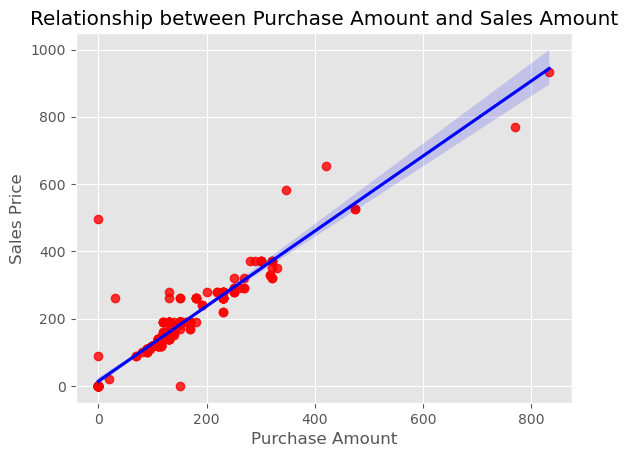

In [39]:
# Plot regression plot to analyze relationship between 'PAID_AMOUNT' and 'INVOICE_AMOUNT'
sns.regplot(x='Purchase_Amount', y='Sales_Price', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.xlabel('Purchase Amount')
plt.ylabel('Sales Price')
plt.title('Relationship between Purchase Amount and Sales Amount')
plt.show()


#### A2: The regression plot visualizes the relationship between the paid amount and invoice amount, indicating how changes in the paid amount affect the invoice amount.

#### Q3: How do customer types impact sales?

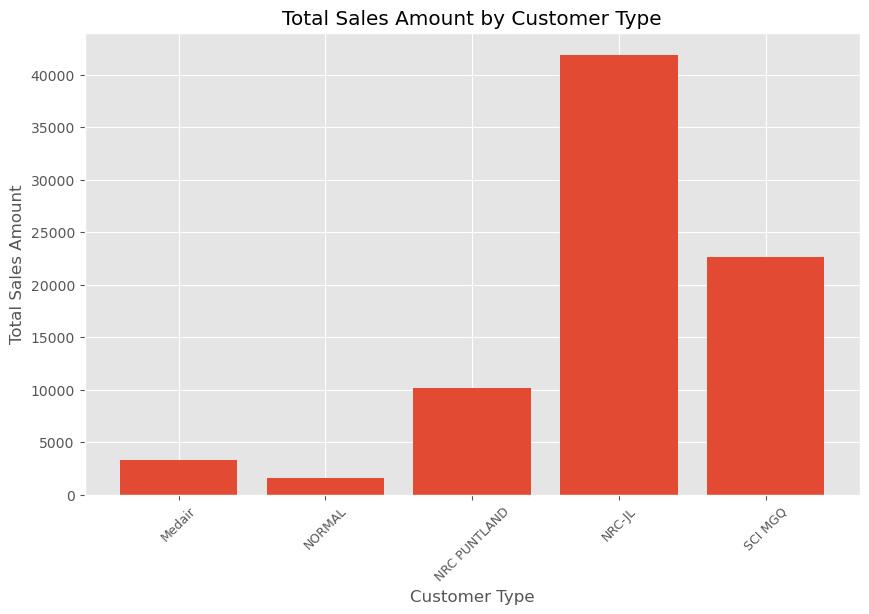

In [40]:
# Group by customer type and visualize sales trends
df_by_customer_type = df.groupby('Customer_Type').sum(numeric_only=True).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(x=df_by_customer_type['Customer_Type'], height=df_by_customer_type['Sales_Price'])
plt.xlabel("Customer Type")
plt.ylabel("Total Sales Amount")
plt.title("Total Sales Amount by Customer Type")
plt.xticks(rotation=45, fontsize=9)
plt.show()


#### A3: The bar chart illustrates the impact of different customer types on sales, allowing for a comparison of total sales amounts across customer segments.

In [41]:
# solve x and y data into variables
X = df[["Sales_Price"]]
y = df[["Purchase_Amount"]]

In [43]:
# split dataset into training and holdout datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [46]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(X_test)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 9.86168077555473
Mean Squared Error: 449.22578838407895
Root Mean Squared Error: 21.194947237114768
R-squared: 0.9300956180964637


In [53]:
# Assuming new_data is your new dataset
new_predictions = lr.predict(X_test)


In [54]:
# Print coefficients
print("Coefficients:", lr.coef_)

# Optionally, you can interpret coefficients to understand feature importance


Coefficients: [[0.81678259]]


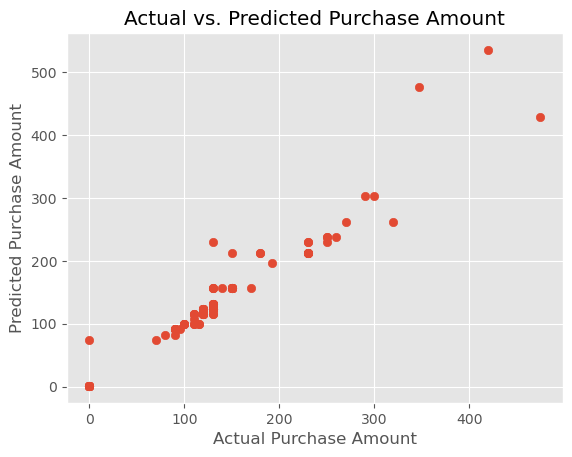

In [55]:
plt.scatter(y_test, new_predictions)
plt.xlabel("Actual Purchase Amount")
plt.ylabel("Predicted Purchase Amount")
plt.title("Actual vs. Predicted Purchase Amount")
plt.show()
